In [1]:
import geopandas as gpd
import pandas as pd
import json
pd.set_option('display.max_columns', None)

Importing Data

In [2]:
precinct_boundaries = gpd.read_file('data/Arizona/boundary_data/az_2020.shp')
us_hor_results = pd.read_csv('data/2020-HOUSE-precinct-general.csv')
racial_demographics = pd.read_csv('data/Arizona/demographic_data/vtd/DECENNIALPL2020.P2-Data.csv')

Exploratory Data Analysis

In [3]:
display(racial_demographics[racial_demographics['NAME'].str.contains('VotingPrecinct')].head())
display(precinct_boundaries[precinct_boundaries['CDE_COUNTY'] == 'YU'].head())
#Yuma county has an irregular naming convention

,GEO_ID,NAME,P2_001N,P2_001NA,P2_002N,P2_002NA,P2_003N,P2_003NA,P2_004N,P2_004NA,P2_005N,P2_005NA,P2_006N,P2_006NA,P2_007N,P2_007NA,P2_008N,P2_008NA,P2_009N,P2_009NA,P2_010N,P2_010NA,P2_011N,P2_011NA,P2_012N,P2_012NA,P2_013N,P2_013NA,P2_014N,P2_014NA,P2_015N,P2_015NA,P2_016N,P2_016NA,P2_017N,P2_017NA,P2_018N,P2_018NA,P2_019N,P2_019NA,P2_020N,P2_020NA,P2_021N,P2_021NA,P2_022N,P2_022NA,P2_023N,P2_023NA,P2_024N,P2_024NA,P2_025N,P2_025NA,P2_026N,P2_026NA,P2_027N,P2_027NA,P2_028N,P2_028NA,P2_029N,P2_029NA,P2_030N,P2_030NA,P2_031N,P2_031NA,P2_032N,P2_032NA,P2_033N,P2_033NA,P2_034N,P2_034NA,P2_035N,P2_035NA,P2_036N,P2_036NA,P2_037N,P2_037NA,P2_038N,P2_038NA,P2_039N,P2_039NA,P2_040N,P2_040NA,P2_041N,P2_041NA,P2_042N,P2_042NA,P2_043N,P2_043NA,P2_044N,P2_044NA,P2_045N,P2_045NA,P2_046N,P2_046NA,P2_047N,P2_047NA,P2_048N,P2_048NA,P2_049N,P2_049NA,P2_050N,P2_050NA,P2_051N,P2_051NA,P2_052N,P2_052NA,P2_053N,P2_053NA,P2_054N,P2_054NA,P2_055N,P2_055NA,P2_056N,P2_056NA,P2_057N,P2_057NA,P2_058N,P2_058NA,P2_059N,P2_059NA,P2_060N,P2_060NA,P2_061N,P2_061NA,P2_062N,P2_062NA,P2_063N,P2_063NA,P2_064N,P2_064NA,P2_065N,P2_065NA,P2_066N,P2_066NA,P2_067N,P2_067NA,P2_068N,P2_068NA,P2_069N,P2_069NA,P2_070N,P2_070NA,P2_071N,P2_071NA,P2_072N,P2_072NA,P2_073N,P2_073NA,Unnamed: 148
1496,7000000US04027000P01,"VotingPrecinct 01, Yuma County, Arizona",3304,NaN,2533,NaN,771,NaN,710,NaN,520,NaN,115,NaN,51,NaN,5,NaN,2,NaN,17,NaN,61,NaN,57,NaN,11,NaN,19,NaN,2,NaN,2,NaN,16,NaN,5,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,1,NaN,0,NaN,0,NaN,4,NaN,0,NaN,0,NaN,3,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN
1497,7000000US04027000P02,"VotingPrecinct 02, Yuma County, Arizona",3006,NaN,2195,NaN,811,NaN,764,NaN,612,NaN,77,NaN,25,NaN,18,NaN,2,NaN,30,NaN,47,NaN,43,NaN,11,NaN,12,NaN,12,NaN,0,NaN,5,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,1,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2,NaN,2,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN
1498,7000000US04027000P03,"VotingPrecinct 03, Yuma County, Arizona",4816,NaN,3791,NaN,1025,NaN,971,NaN,835,NaN,54,NaN,57,NaN,13,NaN,0,NaN,12,NaN,54,NaN,49,NaN,7,NaN,29,NaN,0,NaN,1,NaN,10,NaN,0,NaN,1,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,3,NaN,2,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN
1499,7000000US04027000P04,"VotingPrecinct 04, Yuma County, Arizona",8459,NaN,6661,NaN,1798,NaN,1705,NaN,1405,NaN,106,NaN,45,NaN,113,NaN,8,NaN,28,NaN,93,NaN,90,NaN,27,NaN,26,NaN,11,NaN,3,NaN,15,NaN,3,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,4,NaN,0,NaN,0,NaN,0,NaN,3,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,2,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN
1500,7000000US04027000P05,"VotingPrecinct 05, Yuma County, Arizona",4648,NaN,2670,NaN,1978,NaN,1838,NaN,1461,NaN,90,NaN,22,NaN,231,NaN,18,NaN,16,NaN,140,NaN,134,NaN,22,NaN,25,NaN,31,NaN,11,NaN,30,NaN,3,NaN,4,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,6,NaN,0,NaN,1,NaN,6,NaN,2,NaN,0,NaN,0,NaN,0,NaN,3,NaN,0,NaN,0,NaN,1,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN


,CDE_COUNTY,PCTNUM,PRECINCTNA,G20PREDBID,G20PRERTRU,G20PRELJOR,G20USSDKEL,G20USSRMCS,geometry
221,YU,YU0044,Yuma 44,0,0,0,0,0,"POLYGON ((-114.40973 32.62680, -114.36686 32.6..."
222,YU,YU0021,Yuma 21,0,0,0,0,0,"POLYGON ((-114.55523 32.59703, -114.36691 32.5..."
223,YU,YU0017,Yuma 17,893,1838,45,943,1805,"POLYGON ((-114.44320 32.84534, -114.44314 32.8..."
224,YU,YU0020,Yuma 20,541,1449,24,602,1388,"POLYGON ((-114.36686 32.62695, -114.36681 32.6..."
225,YU,YU0037,Yuma 37,850,565,25,892,519,"POLYGON ((-114.62459 32.72153, -114.62393 32.7..."


Boundary Data Cleaning

In [4]:
precinct_boundaries['precinct'] = precinct_boundaries['PRECINCTNA'].str.lower()
precinct_boundaries.drop(['PCTNUM','PRECINCTNA', "CDE_COUNTY" ,"G20PREDBID","G20PRERTRU","G20PRELJOR","G20USSDKEL","G20USSRMCS"], axis = 1, inplace=True)
display(precinct_boundaries)

,geometry,precinct
0,"POLYGON ((-109.49567 33.65280, -109.49576 33.6...",alpine
1,"POLYGON ((-109.71666 36.26151, -109.71658 36.2...",canyon de chelly
2,"POLYGON ((-109.81183 36.27512, -109.80810 36.2...",chinle
3,"POLYGON ((-109.53982 34.44871, -109.53928 34.4...",concho
4,"POLYGON ((-109.81768 36.14760, -109.81822 36.1...",cottonwood
...,...,...
1484,"POLYGON ((-109.27632 33.13312, -109.27637 33.1...",clifton 1
1485,"POLYGON ((-109.31894 33.05199, -109.31855 33.0...",east plantsite
1486,"POLYGON ((-112.04047 34.80011, -112.04045 34.8...",ghost
1487,"POLYGON ((-111.49511 33.99991, -111.49533 33.9...",bug


Voting Data Cleaning

In [5]:
us_hor_results.drop(
    ["office",'party_detailed','mode',
     'county_name','county_fips','jurisdiction_name',
     'jurisdiction_fips','candidate',
     'district','magnitude','dataverse',
     'year','stage','state','special',
     'writein','state_fips',
     'state_cen','state_ic',
     'date','readme_check'],
     axis = 1, inplace=True)
vote = us_hor_results[us_hor_results['state_po'] == 'AZ'].copy()
vote.drop(["state_po"], axis = 1, inplace=True)
vote['precinct'] = vote['precinct'].str.lower()
display(vote)

,precinct,party_simplified,votes
12921,001 eagle,DEMOCRAT,0
12922,001 eagle,DEMOCRAT,0
12923,001 eagle,DEMOCRAT,0
12924,001 eagle,REPUBLICAN,14
12925,001 eagle,REPUBLICAN,1
...,...,...,...
21850,0747 yuma,DEMOCRAT,38
21851,0747 yuma,DEMOCRAT,1
21852,0747 yuma,REPUBLICAN,644
21853,0747 yuma,REPUBLICAN,81


Demographic Data Cleaning

In [6]:
racial_demographics.drop([0], axis = 0, inplace=True) #drop Header row
racial_demographics['totalPop'] = racial_demographics['P2_001N'].astype(int)
racial_demographics['africanAmericanPop'] = racial_demographics['P2_006N'].astype(int)
racial_demographics['caucasianPop'] = racial_demographics['P2_005N'].astype(int)
racial_demographics['latinoPop'] = racial_demographics['P2_002N'].astype(int)
racial_demographics['asainPop'] = racial_demographics['P2_008N'].astype(int)
racial_demographics['nativeAmericanPop'] = racial_demographics['P2_007N'].astype(int)
racial_demographics['precinct'] = racial_demographics['NAME'].apply(lambda precinct: precinct.split(',')[0])
racial_demographics['precinct'] = racial_demographics['precinct'].str.lower()
racial_demographics['precinct'] = racial_demographics['precinct'].str.replace('votingprecinct', 'yuma', regex = True)
final_columns = ['precinct', 'totalPop','africanAmericanPop','caucasianPop','latinoPop','asainPop', 'nativeAmericanPop']
racial_demographics = racial_demographics[racial_demographics.columns.intersection(final_columns)]
display(racial_demographics)

,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop,precinct
1,664,2,553,77,0,7,alpine
2,4666,13,62,40,20,4502,canyon de chelly
3,2949,22,177,62,74,2552,chinle
4,2945,6,2420,279,10,43,concho
5,693,1,2,17,0,662,cornfields
...,...,...,...,...,...,...,...
1534,4624,148,1430,2776,105,47,yuma 39
1535,4139,94,1318,2529,63,23,yuma 40
1536,4937,97,1336,3151,173,39,yuma 41
1537,6615,160,1291,4770,172,35,yuma 42


Combining Data Functions

In [7]:
def total_votes(precinct, party, votes):
    #precinct_votes = get_precinct(precinct, votes)
    precinct_votes = votes[votes['precinct'].str.contains(precinct)]
    precinct_votes = precinct_votes[precinct_votes['party_simplified'] == party]
    return precinct_votes['votes'].sum()

def get_precinct(precinct, votes):
    precinct_votes = votes[votes['precinct'].str.contains(precinct)]
    return precinct_votes

Combining Data

In [8]:
state = precinct_boundaries #take precinct_boundaries as base for combined precincts
state['demVotes'] = state['precinct'].apply(lambda precinct: total_votes(precinct, 'DEMOCRAT', vote))
state['repVotes'] = state['precinct'].apply(lambda precinct: total_votes(precinct, 'REPUBLICAN', vote))
state['totalVotes'] = state['demVotes'] + state['repVotes']
display(state)

,geometry,precinct,demVotes,repVotes,totalVotes
0,"POLYGON ((-109.49567 33.65280, -109.49576 33.6...",alpine,105,271,376
1,"POLYGON ((-109.71666 36.26151, -109.71658 36.2...",canyon de chelly,1964,300,2264
2,"POLYGON ((-109.81183 36.27512, -109.80810 36.2...",chinle,964,171,1135
3,"POLYGON ((-109.53982 34.44871, -109.53928 34.4...",concho,373,1407,1780
4,"POLYGON ((-109.81768 36.14760, -109.81822 36.1...",cottonwood,2282,2558,4840
...,...,...,...,...,...
1484,"POLYGON ((-109.27632 33.13312, -109.27637 33.1...",clifton 1,381,356,737
1485,"POLYGON ((-109.31894 33.05199, -109.31855 33.0...",east plantsite,59,142,201
1486,"POLYGON ((-112.04047 34.80011, -112.04045 34.8...",ghost,1241,1142,2383
1487,"POLYGON ((-111.49511 33.99991, -111.49533 33.9...",bug,814,2276,3090


In [9]:
state = state.merge(racial_demographics, left_on = 'precinct', right_on = 'precinct', how = 'left')
state = state.fillna(0)
state['totalPop'] = state['totalPop'].astype(int)
state['africanAmericanPop'] = state['africanAmericanPop'].astype(int)
state['caucasianPop'] = state['caucasianPop'].astype(int)
state['latinoPop'] = state['latinoPop'].astype(int)
state['asainPop'] = state['asainPop'].astype(int)
state['nativeAmericanPop'] = state['nativeAmericanPop'].astype(int)
display(state.head())

,geometry,precinct,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop
0,"POLYGON ((-109.49567 33.65280, -109.49576 33.6...",alpine,105,271,376,664,2,553,77,0,7
1,"POLYGON ((-109.71666 36.26151, -109.71658 36.2...",canyon de chelly,1964,300,2264,4666,13,62,40,20,4502
2,"POLYGON ((-109.81183 36.27512, -109.80810 36.2...",chinle,964,171,1135,2949,22,177,62,74,2552
3,"POLYGON ((-109.53982 34.44871, -109.53928 34.4...",concho,373,1407,1780,2945,6,2420,279,10,43
4,"POLYGON ((-109.81768 36.14760, -109.81822 36.1...",cottonwood,2282,2558,4840,1529,0,1,15,0,1496


Error Analysis

In [10]:
display(state[(state['totalVotes'] == 0) | (state['totalPop'] == 0)].head())

,geometry,precinct,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop
30,"POLYGON ((-109.04621 35.71881, -109.04629 35.6...",st michaels,0,0,0,0,0,0,0,0,0
48,"POLYGON ((-110.04354 31.86113, -110.04357 31.8...",st david,361,1198,1559,0,0,0,0,0,0
56,"POLYGON ((-111.64822 35.17260, -111.64752 35.1...",flagstaff #19,0,0,0,0,0,0,0,0,0
90,"POLYGON ((-111.35065 34.29434, -111.35071 34.2...",p/s east,0,0,0,0,0,0,0,0,0
91,"POLYGON ((-111.67580 34.28941, -111.67582 34.2...",p/s west,0,0,0,0,0,0,0,0,0


In [11]:
display(state[state['precinct'].str.contains('pima')].head())
display(vote[vote['precinct'].str.contains('pima')].head())
display(state['totalVotes'].value_counts())

,geometry,precinct,demVotes,repVotes,totalVotes,totalPop,africanAmericanPop,caucasianPop,latinoPop,asainPop,nativeAmericanPop
94,"POLYGON ((-109.77387 32.88395, -109.77426 32.8...",pima,1649,2809,4458,3817,57,2944,451,120,19
869,"POLYGON ((-111.89166 33.50210, -111.89166 33.5...",pima,1649,2809,4458,3817,57,2944,451,120,19
1251,"POLYGON ((-112.93221 32.50500, -112.93215 32.4...",pima 2,0,0,0,0,0,0,0,0,0
1252,"POLYGON ((-112.91575 32.50498, -112.89862 32.5...",pima 1,0,0,0,0,0,0,0,0,0
1253,"POLYGON ((-112.26686 32.50672, -112.25006 32.5...",pima 136,0,0,0,0,0,0,0,0,0


,precinct,party_simplified,votes
14385,pima #9,DEMOCRAT,266
14386,pima #9,DEMOCRAT,74
14387,pima #9,DEMOCRAT,7
14388,pima #9,REPUBLICAN,1024
14389,pima #9,REPUBLICAN,578


0        361
9216       8
4564       6
6244       5
2764       5
        ... 
4668       1
5531       1
2602       1
2588       1
14563      1
Name: totalVotes, Length: 1013, dtype: int64

<AxesSubplot: >

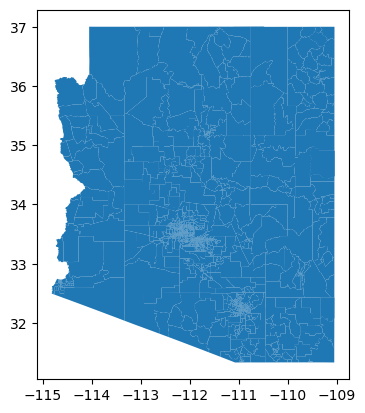

In [12]:
display(state.plot()) #spot check the geometry

Exporting State Data

In [13]:
state.to_file('data/Arizona/arizonaGeo.geojson', driver='GeoJSON', index = True)
noGeo = pd.DataFrame(state.drop(columns='geometry'))
noGeo.to_json('data/Arizona/arizona.json', orient = 'index', compression = 'infer', index = True, indent = 4)

Computing Adjacency Graph Functions

In [14]:
def generate_adj(precinct, state):
    return 0

def addEdge(edges, index1, index2):
    if(index1 < index2):
        edges.add((int(index1),int(index2)))
    if(index1 > index2):
        edges.add((int(index2),int(index1)))

Computing Adjacency Graph

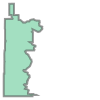

array([ 66,  69, 188, 206, 329, 330], dtype=int64)

{(365, 390),
 (229, 466),
 (736, 791),
 (536, 537),
 (166, 446),
 (78, 333),
 (859, 898),
 (1166, 1198),
 (1119, 1123),
 (682, 856),
 (343, 344),
 (1363, 1483),
 (594, 743),
 (148, 397),
 (694, 830),
 (1174, 1175),
 (1060, 1073),
 (25, 34),
 (579, 620),
 (277, 398),
 (1251, 1278),
 (376, 377),
 (634, 901),
 (686, 1091),
 (970, 999),
 (14, 24),
 (1207, 1208),
 (74, 75),
 (681, 753),
 (1013, 1077),
 (144, 399),
 (1039, 1215),
 (514, 1250),
 (937, 938),
 (1310, 1449),
 (1424, 1471),
 (635, 902),
 (943, 1018),
 (120, 307),
 (1007, 1039),
 (575, 1116),
 (631, 788),
 (1199, 1209),
 (1311, 1450),
 (116, 193),
 (797, 820),
 (575, 707),
 (1189, 1195),
 (732, 1099),
 (1041, 1180),
 (1267, 1343),
 (387, 427),
 (1440, 1451),
 (280, 301),
 (170, 429),
 (971, 972),
 (391, 397),
 (383, 393),
 (576, 708),
 (994, 1221),
 (2, 27),
 (1321, 1350),
 (632, 1097),
 (1442, 1460),
 (901, 913),
 (154, 161),
 (173, 174),
 (700, 743),
 (725, 916),
 (593, 617),
 (602, 1111),
 (1004, 1005),
 (1318, 1430),
 (503, 72

4230

In [15]:
edges = set()
testi = 57
display(state['geometry'][testi])
touch = state['geometry'].touches(state['geometry'][testi])
statesubset = state[touch]
display(statesubset.index.values)

for i in state.index:
    touch = state['geometry'].touches(state['geometry'][i])
    statesubset = state[touch]
    for j in statesubset.index.values:
        addEdge(edges, i, j)

display(edges)
display(len(edges))

Edge Spot Check

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

<AxesSubplot: >

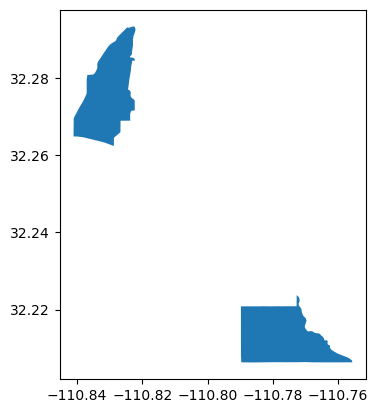

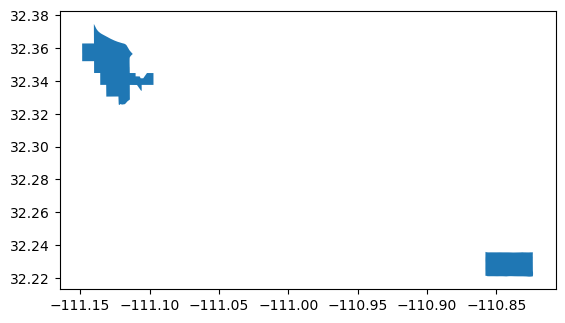

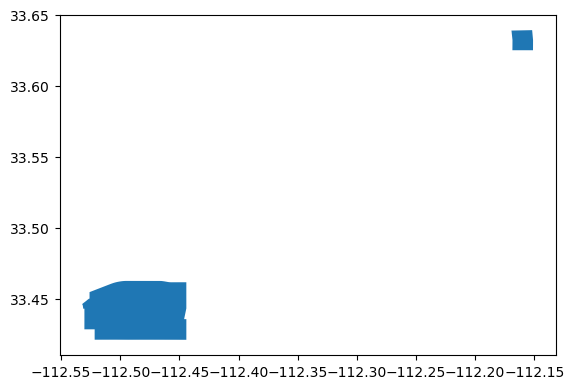

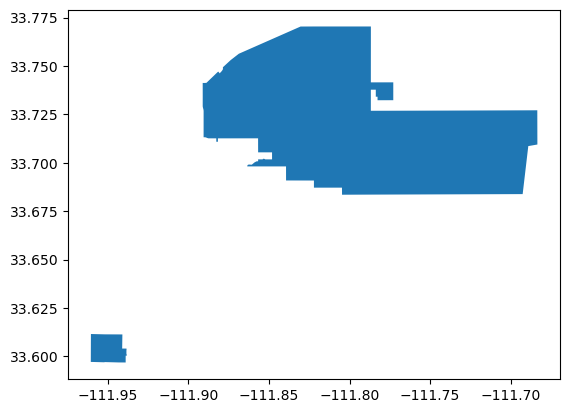

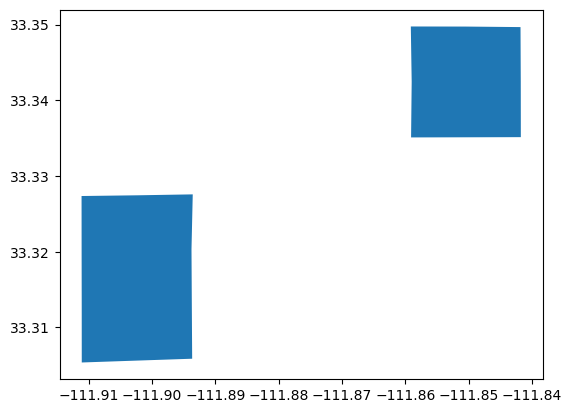

In [16]:
indexs = [1268, 1466]
display(state.iloc[indexs].plot())
indexs = [1411, 1468]
display(state.iloc[indexs].plot())
indexs = [1014, 1034]
display(state.iloc[indexs].plot())
indexs = [735, 860]
display(state.iloc[indexs].plot())
indexs = [538, 539]
display(state.iloc[indexs].plot())

Exporting Adjacency Graph Edges

In [17]:
edgeList = list(edges)
display(edgeList)
display(type(edgeList[0]))
display(type(edgeList[0][0]))
with open('data/Arizona/arizonaEdges.json', 'w', encoding='utf-8') as file:
    json.dump(edgeList, file, ensure_ascii=False, indent=4)

[(365, 390),
 (229, 466),
 (736, 791),
 (536, 537),
 (166, 446),
 (78, 333),
 (859, 898),
 (1166, 1198),
 (1119, 1123),
 (682, 856),
 (343, 344),
 (1363, 1483),
 (594, 743),
 (148, 397),
 (694, 830),
 (1174, 1175),
 (1060, 1073),
 (25, 34),
 (579, 620),
 (277, 398),
 (1251, 1278),
 (376, 377),
 (634, 901),
 (686, 1091),
 (970, 999),
 (14, 24),
 (1207, 1208),
 (74, 75),
 (681, 753),
 (1013, 1077),
 (144, 399),
 (1039, 1215),
 (514, 1250),
 (937, 938),
 (1310, 1449),
 (1424, 1471),
 (635, 902),
 (943, 1018),
 (120, 307),
 (1007, 1039),
 (575, 1116),
 (631, 788),
 (1199, 1209),
 (1311, 1450),
 (116, 193),
 (797, 820),
 (575, 707),
 (1189, 1195),
 (732, 1099),
 (1041, 1180),
 (1267, 1343),
 (387, 427),
 (1440, 1451),
 (280, 301),
 (170, 429),
 (971, 972),
 (391, 397),
 (383, 393),
 (576, 708),
 (994, 1221),
 (2, 27),
 (1321, 1350),
 (632, 1097),
 (1442, 1460),
 (901, 913),
 (154, 161),
 (173, 174),
 (700, 743),
 (725, 916),
 (593, 617),
 (602, 1111),
 (1004, 1005),
 (1318, 1430),
 (503, 72

tuple

int